In [1]:
import sys
import torch
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("../../../")
import manifold_flow as mf
from manifold_flow import transforms, utils, flows, distributions, training
from manifold_flow import nn as nn_

## Data

In [2]:
n = 1000
x = torch.randn(n).view(-1,1)
y = 0.5*(1.5 + x)*(1.5-x)

xy = torch.cat([x,y],1)

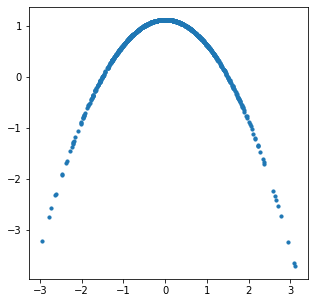

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(x.numpy(), y.numpy(), s=10.)
plt.show()

## Model

In [4]:
trf = transforms.AffineCouplingTransform(
    mask=utils.create_alternating_binary_mask(2, even=True),
    transform_net_create_fn=lambda in_features, out_features: nn_.ResidualNet(
        in_features=in_features,
        out_features=out_features,
        hidden_features=5,
        context_features=None,
        num_blocks=3,
        activation=torch.nn.functional.relu,
        dropout_probability=0,
        use_batch_norm=False,
    ),
)

In [33]:
flow = flows.autoencoding_flow.TwoStepAutoencodingFlow(
    data_dim=2,
    latent_dim=1,
    inner_transform=None,
    outer_transform=trf,
)

AttributeError: module 'manifold_flow.flows' has no attribute 'autoencoding_flow'